In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [82]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [85]:
y.head()

0    101.159902
1     78.442913
2   -159.238195
3    120.719533
4      2.920673
Name: 0, dtype: float64

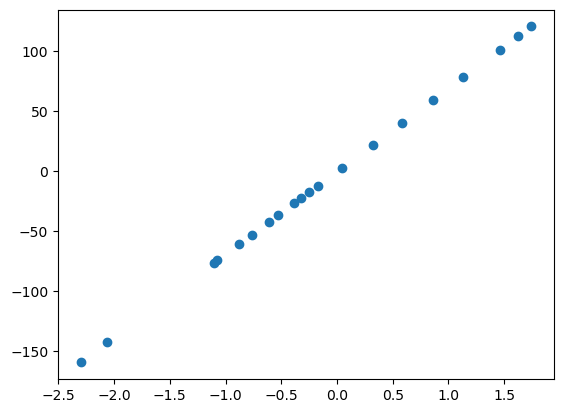

In [87]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [353]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 1
        self.b1 = 2
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(Y))
    def fit(self, X, Y):  
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(Y)
        dJ1 = sum((self.predict(X) - Y) * X) /len(Y)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [355]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

1
201
initial error: 2779.7235840959734


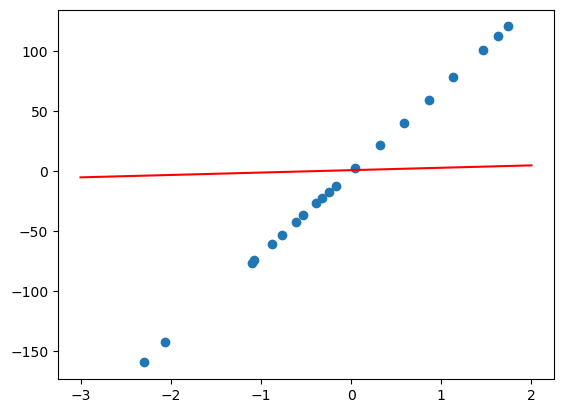

In [357]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [359]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2131.0399681234826


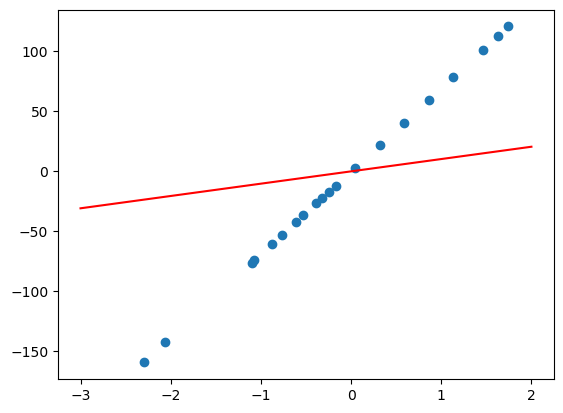

In [361]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [385]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(Y)))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        # Проверяем, является ли X DataFrame
        if isinstance(X, pd.DataFrame):
            if len(X.columns) != 1:
                raise ValueError("DataFrame должен содержать только один столбец для X")
            X = X.iloc[:, 0]  # Берем первый столбец
        
        # Проверяем, является ли Y DataFrame
        if isinstance(Y, pd.DataFrame):
            if len(Y.columns) != 1:
                raise ValueError("DataFrame должен содержать только один столбец для Y")
            Y = Y.iloc[:, 0]  # Берем первый столбец
        
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(Y)
            dJ1 = sum((self.predict(X) - Y) * X) / len(Y)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            
            # Проверяем точность
            if len(errors) > 1 and abs(errors[-1] - errors[-2]) < accuracy:
                break
                
        return steps, errors

In [387]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 4.4961047667431675


Начальные значения: b0 = 0, b1 = 0
Оптимальные значения: b0 = -1.2440683813520463, b1 = 66.58600653468042
Ошибка: 4.4961047667431675
----------------------------------------


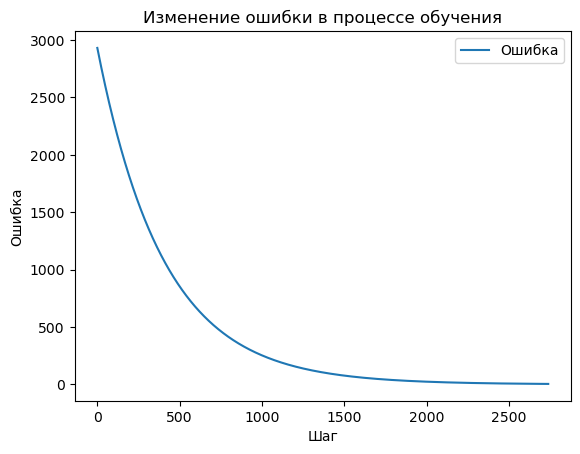

Начальные значения: b0 = 1, b1 = 1
Оптимальные значения: b0 = -1.1751109192397429, b1 = 66.57838416072663
Ошибка: 4.459802114314187
----------------------------------------


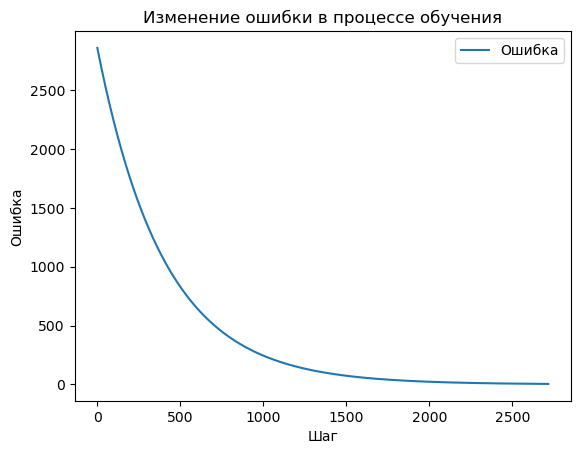

Начальные значения: b0 = -1, b1 = 2
Оптимальные значения: b0 = -1.2923762196930992, b1 = 66.59249612208319
Ошибка: 4.521029880082638
----------------------------------------


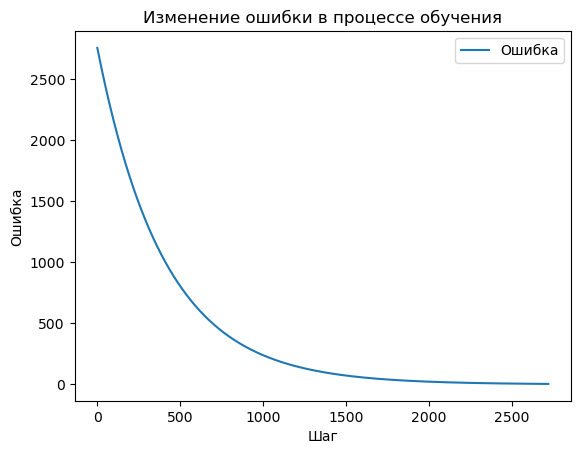

Начальные значения: b0 = 10, b1 = -5
Оптимальные значения: b0 = -0.653519497438543, b1 = 66.55587796754877
Ошибка: 4.234839927153343
----------------------------------------


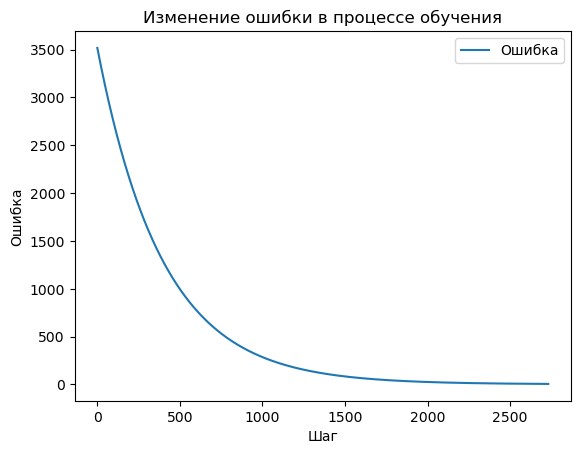

In [389]:
#Задание 1
initial_values = [
    (0, 0),
    (1, 1),
    (-1, 2),
    (10, -5)
]
for b0_init, b1_init in initial_values:
    model = Model()
    model.b0 = b0_init
    model.b1 = b1_init

    steps, errors = model.fit(x, y)

    print(f"Начальные значения: b0 = {b0_init}, b1 = {b1_init}")
    print(f"Оптимальные значения: b0 = {model.b0}, b1 = {model.b1}")
    print(f"Ошибка: {model.error(x, y)}")
    print("-" * 40)

    plt.figure()
    plt.plot(steps, errors, label="Ошибка")
    plt.xlabel("Шаг")
    plt.ylabel("Ошибка")
    plt.title("Изменение ошибки в процессе обучения")
    plt.legend()
    plt.show()

In [391]:
# Задание 2
alphas = [0.001, 0.01, 0.1, 1.0, 2.0]

for alpha in alphas:
    # Создаем модель
    model = Model()

    # Обучаем модель с текущим alpha
    steps, errors = model.fit(x, y, alpha=alpha)

    # Выводим результаты
    print(f"Скорость обучения (alpha): {alpha}")
    print(f"Оптимальные значения: b0 = {model.b0}, b1 = {model.b1}")
    print(f"Ошибка: {model.error(x, y)}")
    print("-" * 40)

Скорость обучения (alpha): 0.001
Оптимальные значения: b0 = -1.2440683813520463, b1 = 66.58600653468042
Ошибка: 4.4961047667431675
----------------------------------------
Скорость обучения (alpha): 0.01
Оптимальные значения: b0 = -0.5548981944374876, b1 = 68.41160380982478
Ошибка: 0.4661663885962549
----------------------------------------
Скорость обучения (alpha): 0.1
Оптимальные значения: b0 = -0.1973708876955474, b1 = 69.00466893600267
Ошибка: 0.035220572400342896
----------------------------------------
Скорость обучения (alpha): 1.0
Оптимальные значения: b0 = 0.015311694205337581, b1 = 69.15453661027446
Ошибка: 0.0008603627290350646
----------------------------------------
Скорость обучения (alpha): 2.0
Оптимальные значения: b0 = nan, b1 = nan
Ошибка: nan
----------------------------------------
